In [1]:
library(DESeq2)
library(ggplot2)
library(RColorBrewer)
library(pheatmap)
library(ggrepel)
library(BiocManager)
library(apeglm)
library(repr)
library(dplyr)

#print information about OS, R version, packages version, etc.
sessionInfo()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

ERROR: Error in library(apeglm): there is no package called ‘apeglm’


In [4]:
countData <- read.table('gene_counts_inputforR_250630.txt', header=TRUE, row.names=1, check.names=FALSE)
head(countData)

,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C1_S10_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C2_S12_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C3_S14_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C4_S16_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C5_S17_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_C6_S18_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO1_S9_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO2_S11_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO3_S13_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO4_S15_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO5_S19_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Aged_KO6_S20_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_C1_S1_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_C2_S2_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_C3_S6_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_C4_S7_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_KO1_S3_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_KO2_S4_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_KO3_S5_L003.Aligned.sortedByCoord.out.bam,/tscc/nfs/home/ssharvey/scratch_2.0_new/fat14_aging_RNAseq/star_output/Young_KO4_S8_L003.Aligned.sortedByCoord.out.bam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Xkr4,2325,1994,1862,1589,1415,1837,2284,1709,1885,1485,1115,1547,2057,1627,2512,2386,1874,2523,2260,2374
Gm1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gm19938,2,3,6,8,1,2,0,2,0,2,4,6,4,2,4,3,2,0,0,8
Gm37381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Rp1,4,0,1,12,0,0,12,2,10,0,0,14,6,6,6,4,0,10,0,2
Sox17,217,335,424,389,351,402,258,291,343,227,360,296,153,187,184,180,194,213,180,166


In [5]:
#edit sample names for easier reading
orig_names <- colnames(countData)

#use a regex to extract only the sample names (two underscore parts)
new_names <- sub(".*/([^_]+_[^_]+).*", "\\1", orig_names)

colnames(countData) <- new_names

In [6]:
metaData <- read.delim('metadata.txt')
metaData

Sample,Genotype,Age,Sex
<chr>,<chr>,<chr>,<chr>
Aged_C1,Ctrl,20months,M
Aged_C2,Ctrl,20months,M
Aged_C3,Ctrl,20months,F
Aged_C4,Ctrl,20months,F
Aged_C5,Ctrl,20months,F
Aged_C6,Ctrl,20months,F
Aged_KO1,cKO,20months,M
Aged_KO2,cKO,20months,M
Aged_KO3,cKO,20months,F


In [7]:
metaData$Sample <- factor(metaData$Sample)
metaData$Genotype <- factor(metaData$Genotype, levels = c("Ctrl", "cKO"))
metaData$Age <- factor(metaData$Age, levels = c("4months", "20months"))
metaData$Sex <- factor(metaData$Sex, levels = c("M", "F"))

In [8]:
rownames(metaData) <- metaData$Sample
metaData

,Sample,Genotype,Age,Sex
,<fct>,<fct>,<fct>,<fct>
Aged_C1,Aged_C1,Ctrl,20months,M
Aged_C2,Aged_C2,Ctrl,20months,M
Aged_C3,Aged_C3,Ctrl,20months,F
Aged_C4,Aged_C4,Ctrl,20months,F
Aged_C5,Aged_C5,Ctrl,20months,F
Aged_C6,Aged_C6,Ctrl,20months,F
Aged_KO1,Aged_KO1,cKO,20months,M
Aged_KO2,Aged_KO2,cKO,20months,M
Aged_KO3,Aged_KO3,cKO,20months,F


In [9]:
# --- 3. Create DESeqDataSet with interaction design ---

dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = metaData,
                              design = ~ Sex + Age + Genotype + Age:Genotype)

In [10]:
# Filter low counts
dds <- dds[rowSums(counts(dds)) > 10, ]

In [11]:
# --- 4. Run DESeq ---
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [12]:
# --- 5. Results extraction ---

# KO effect in Young mice (baseline age group)
res_young <- results(dds, name = "Genotype_cKO_vs_Ctrl")

# KO effect in Aged mice (interaction term added)
res_aged <- results(dds, contrast = list("Genotype_cKO_vs_Ctrl", "Age20months.GenotypecKO"))

In [13]:
# --- 7. View top results ---
head(res_young[order(res_young$padj), ])
head(res_aged[order(res_aged$padj), ])

log2 fold change (MLE): Genotype cKO vs Ctrl 
Wald test p-value: Genotype cKO vs Ctrl 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
Fcrl6          1.020712        16.7991   2.74070   6.12951 8.81518e-10
Gm48302        1.030409       -20.6054   3.60869  -5.70994 1.13015e-08
Gm10855        0.874032        20.8537   3.87024   5.38821 7.11644e-08
1700071M16Rik  1.240139        14.4948   2.82084   5.13848 2.76970e-07
4930519D14Rik  0.807500       -16.6732   3.37561  -4.93932 7.83954e-07
Gm11368        0.749313       -17.4609   3.57115  -4.88943 1.01128e-06
                     padj
                <numeric>
Fcrl6         1.85454e-05
Gm48302       1.18880e-04
Gm10855       4.99052e-04
1700071M16Rik 1.45673e-03
4930519D14Rik 3.29856e-03
Gm11368       3.40574e-03

log2 fold change (MLE): Genotype_cKO_vs_Ctrl vs Age20months.GenotypecKO 
Wald test p-value: Genotype_cKO_vs_Ctrl vs Age20months.GenotypecKO 
DataFrame with 6 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
4930519D14Rik    0.807500      -46.67323  7.315583  -6.37997 1.77119e-10
Fcrl6            1.020712       32.84116  5.925156   5.54267 2.97899e-08
Gm10855          0.874032       38.89705  8.383266   4.63984 3.48672e-06
Rxfp1          710.369036        1.40347  0.304586   4.60780 4.06951e-06
Rasd2         5059.106640       -0.78496  0.171782  -4.56952 4.88835e-06
Gpx5             0.597469      -46.53498 10.224511  -4.55132 5.33115e-06
                     padj
                <numeric>
4930519D14Rik 3.72623e-06
Fcrl6         3.13360e-04
Gm10855       1.63569e-02
Rxfp1         1.63569e-02
Rasd2         1.63569e-02
Gpx5          1.63569e-02

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)

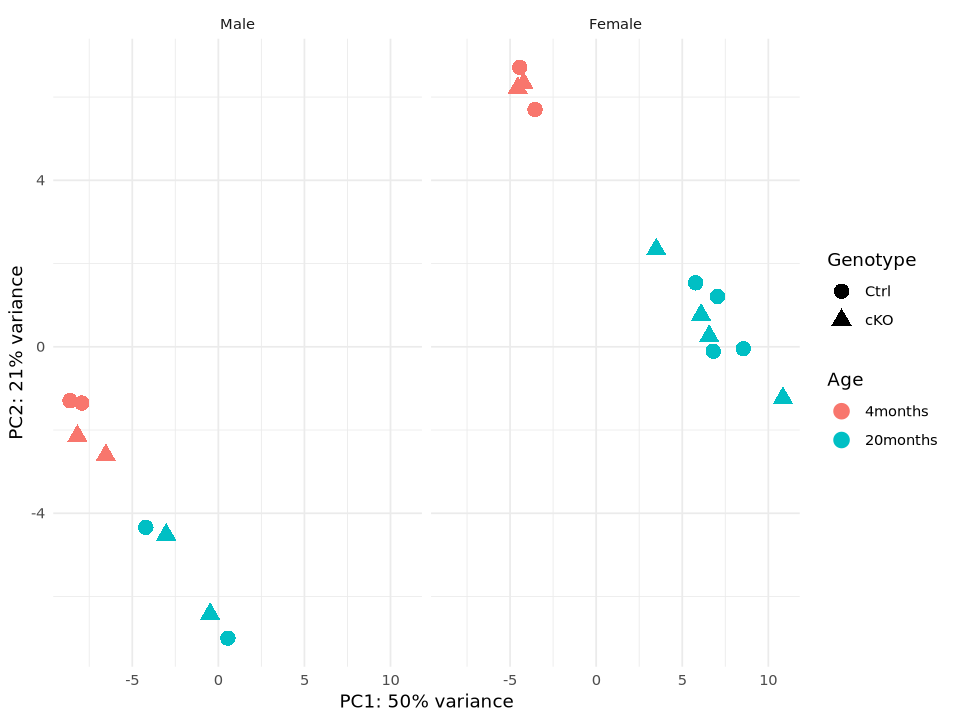

In [15]:
# --- 8. Optional: PCA plot (accounts for sex, age, genotype effects) ---
vsd <- vst(dds, blind=FALSE)
library(ggplot2)
pcaData <- plotPCA(vsd, intgroup=c("Age","Genotype","Sex"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
sex_labels <- c(M = "Male", F = "Female")
ggplot(pcaData, aes(PC1, PC2, color=Age, shape=Genotype)) +
  geom_point(size=4) +
  facet_wrap(~ Sex, labeller = labeller(Sex = sex_labels)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  theme_minimal() 

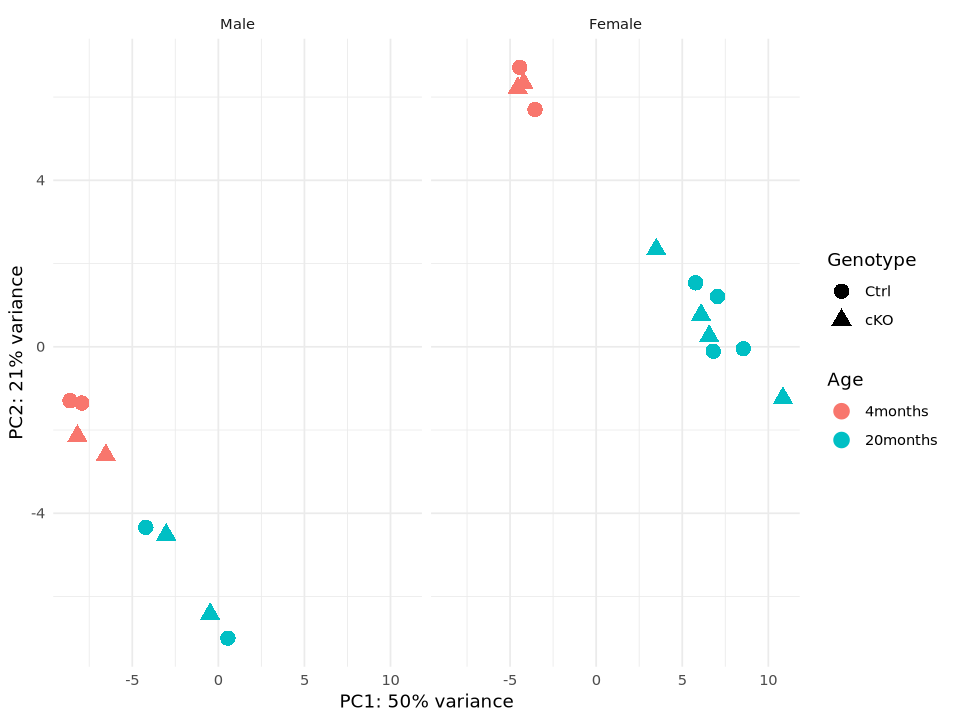

In [16]:
PCA_split <- ggplot(pcaData, aes(PC1, PC2, color=Age, shape=Genotype)) +
              geom_point(size=4) +
              facet_wrap(~ Sex, labeller = labeller(Sex = sex_labels)) +
              xlab(paste0("PC1: ",percentVar[1],"% variance")) +
              ylab(paste0("PC2: ",percentVar[2],"% variance")) +
              theme_minimal() 
PCA_split

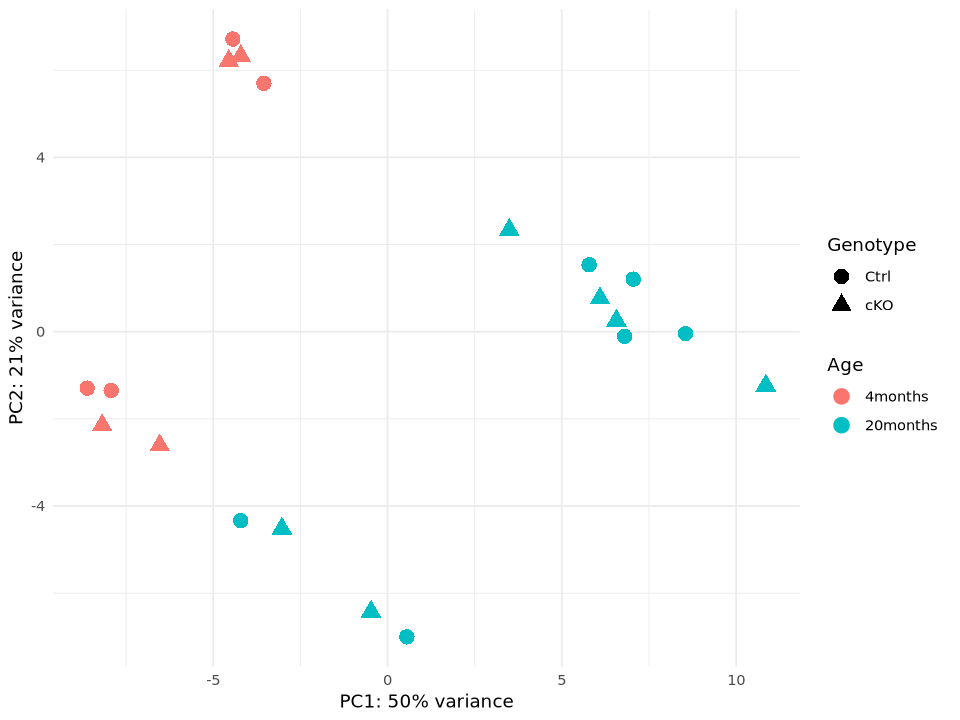

In [17]:
PCA_whole <- ggplot(pcaData, aes(PC1, PC2, color=Age, shape=Genotype)) +
              geom_point(size=4) +
              xlab(paste0("PC1: ",percentVar[1],"% variance")) +
              ylab(paste0("PC2: ",percentVar[2],"% variance")) +
              theme_minimal() 
PCA_whole

In [18]:
#ggsave("figures/PCA_splitbysex.pdf", plot = PCA_split, width = 8, height = 6, units = "in")
#ggsave("figures/PCA.pdf", plot = PCA_whole, width = 8, height = 6, units = "in")

In [19]:
#make heatmap and hierarchical clustering dendrogram based on VST-counts
sampleDist <- dist(t(assay(vsd)))
sampleDistMatrix <- as.matrix(sampleDist)
colnames(sampleDistMatrix) <- NULL

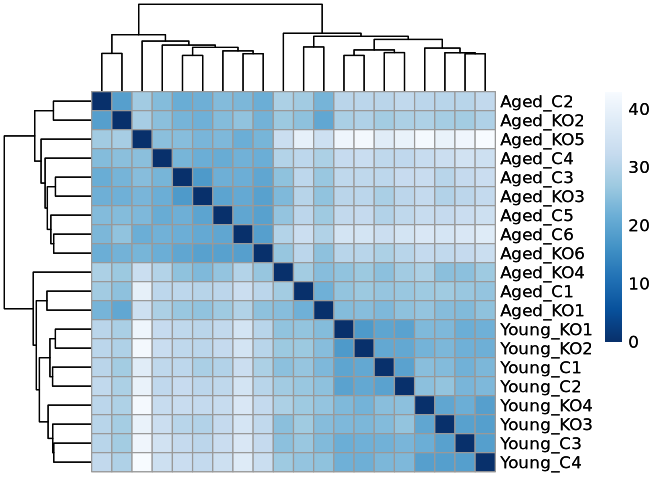

In [20]:
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
options(repr.plot.width = 5.5, repr.plot.height = 4)
dendro_heat <- pheatmap(sampleDistMatrix, clustering_distance_rows = sampleDist, clustering_distance_cols = sampleDist, col = colors)
dendro_heat

In [21]:
#ggsave("figures/Dendrogram_Heatmap.pdf", plot = dendro_heat, width = 5.5, height = 4, units = "in")

In [22]:
#build a new dataframe containing only the 'complete cases', i.e., rows with no NAs
res_young.complete.INTERACTION <- as.data.frame(res_young[complete.cases(res_young),])
res_aged.complete.INTERACTION <- as.data.frame(res_aged[complete.cases(res_aged),])

In [23]:
#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.05
res_young.complete.INTERACTION$DE <- "ns"
res_young.complete.INTERACTION$DE[res_young.complete.INTERACTION$log2FoldChange > 0 & res_young.complete.INTERACTION$padj < 0.05] <- "Up"
res_young.complete.INTERACTION$DE[res_young.complete.INTERACTION$log2FoldChange < 0 & res_young.complete.INTERACTION$padj < 0.05] <- "Down"

res_aged.complete.INTERACTION$DE <- "ns"
res_aged.complete.INTERACTION$DE[res_aged.complete.INTERACTION$log2FoldChange > 0 & res_aged.complete.INTERACTION$padj < 0.05] <- "Up"
res_aged.complete.INTERACTION$DE[res_aged.complete.INTERACTION$log2FoldChange < 0 & res_aged.complete.INTERACTION$padj < 0.05] <- "Down"

In [24]:
countDE_young <- table(res_young.complete.INTERACTION$DE)
countDE_young

countDE_aged <- table(res_aged.complete.INTERACTION$DE)
countDE_aged


 Down    ns    Up 
    7 21026     5 


 Down    ns    Up 
    6 21026     6 

In [25]:
#print out DEGs for both
res_young.complete.INTERACTION[res_young.complete.INTERACTION$DE != "ns", ]
res_aged.complete.INTERACTION[res_aged.complete.INTERACTION$DE != "ns", ]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Fcrl6,1.0207122,16.7991498,2.7407016,6.129507,8.815175e-10,1.854537e-05,Up
Gm10855,0.8740321,20.8536731,3.8702441,5.388206,7.116441e-08,4.990523e-04,Up
4931431C16Rik,0.8958266,-15.5033248,3.2428622,-4.780753,1.746394e-06,4.592581e-03,Down
Igkv1-135,1.7204603,-19.6921507,4.6848540,-4.203365,2.629762e-05,4.610411e-02,Down
Gm44691,0.7556937,-16.0939917,3.7243804,-4.321253,1.551453e-05,3.123356e-02,Down
Gm11368,0.7493129,-17.4609020,3.5711530,-4.889430,1.011285e-06,3.405736e-03,Down
4930519D14Rik,0.8074998,-16.6732255,3.3756114,-4.939320,7.839537e-07,3.298564e-03,Down
Gm48302,1.0304086,-20.6054345,3.6086941,-5.709942,1.130146e-08,1.188801e-04,Down
Gm48371,0.9447270,15.4858272,3.5930607,4.309926,1.633089e-05,3.123356e-02,Up


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Fcrl6,1.0207122,32.8411643,5.9251558,5.542667,2.978994e-08,3.133604e-04,Up
Gm13391,7.4285602,11.0038285,2.6173147,4.204244,2.619568e-05,4.592539e-02,Up
Gm10855,0.8740321,38.8970479,8.3832659,4.639844,3.486719e-06,1.635689e-02,Up
Rxfp1,710.3690356,1.4034709,0.3045859,4.607801,4.069506e-06,1.635689e-02,Up
4931431C16Rik,0.8958266,-31.1237391,6.9561448,-4.474280,7.666925e-06,1.792186e-02,Down
Rasd2,5059.1066396,-0.7849602,0.1717816,-4.569523,4.888353e-06,1.635689e-02,Down
Gpx5,0.5974688,-46.5349765,10.2245109,-4.551316,5.331150e-06,1.635689e-02,Down
Gm11368,0.7493129,-33.9353574,7.7375009,-4.385829,1.155448e-05,2.430831e-02,Down
4930519D14Rik,0.8074998,-46.6732255,7.3155835,-6.379973,1.771191e-10,3.726232e-06,Down


In [26]:
res_young.complete.INTERACTION$Gene <- rownames(res_young.complete.INTERACTION)
res_aged.complete.INTERACTION$Gene <- rownames(res_aged.complete.INTERACTION)

In [27]:
head(res_young.complete.INTERACTION)
head(res_aged.complete.INTERACTION)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1926.9450379,0.1443831,0.1289008,1.1201096,0.2626670,0.9997263,ns,Xkr4
Gm19938,2.8896360,-0.2896803,1.1879017,-0.2438588,0.8073402,0.9997263,ns,Gm19938
Rp1,4.2995848,-1.0547175,1.4687352,-0.7181127,0.4726878,0.9997263,ns,Rp1
Sox17,262.6734850,0.1427352,0.1452544,0.9826569,0.3257763,0.9997263,ns,Sox17
Gm37587,1.3132895,-0.5745411,2.3792305,-0.2414819,0.8091817,0.9997263,ns,Gm37587
Gm37323,0.6775915,-1.9808910,4.4495494,-0.4451891,0.6561831,0.9997263,ns,Gm37323


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1926.9450379,0.34333935,0.2786057,1.23234882,0.2178188,1,ns,Xkr4
Gm19938,2.8896360,-0.02640297,2.5668022,-0.01028633,0.9917928,1,ns,Gm19938
Rp1,4.2995848,-3.28995421,3.1693500,-1.03805330,0.2992452,1,ns,Rp1
Sox17,262.6734850,0.45134431,0.3111868,1.45039655,0.1469480,1,ns,Sox17
Gm37587,1.3132895,-2.09360648,5.1383186,-0.40744972,0.6836777,1,ns,Gm37587
Gm37323,0.6775915,-4.04301357,9.6417414,-0.41932400,0.6749794,1,ns,Gm37323


In [28]:
#write.table(res_young.complete.INTERACTION,file="Young_cKOvsCTRL_complete_results_250630.txt",sep="\t",quote=FALSE,row.names=FALSE)
#write.table(res_aged.complete.INTERACTION, file="Aged_cKOvsCTRL_InteractionTerm_complete_results_250630.txt", sep="\t",quote=FALSE,row.names=FALSE)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


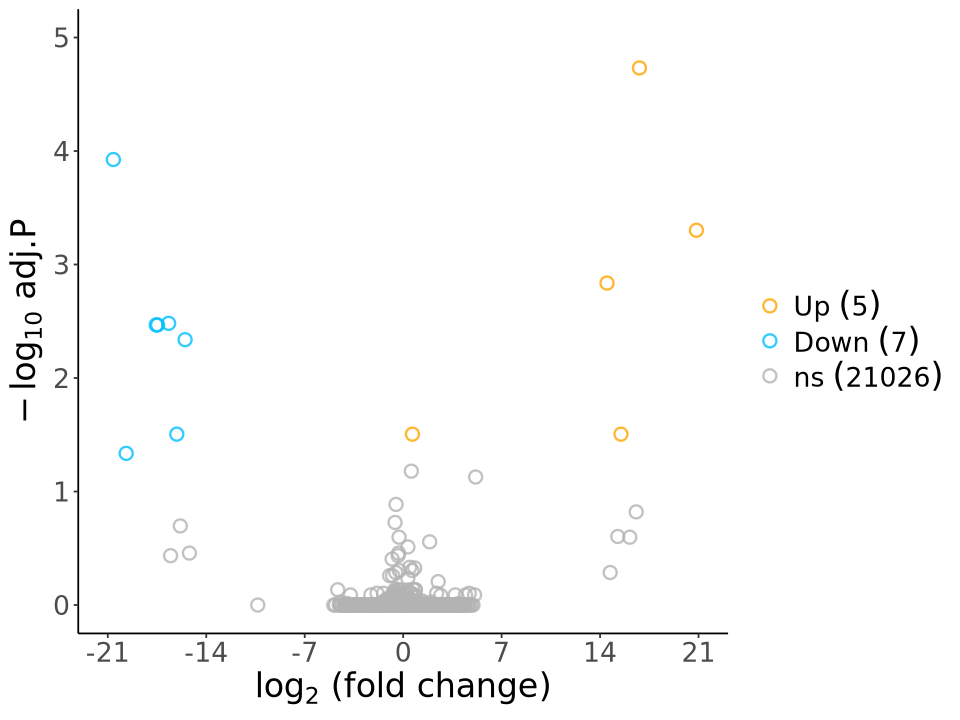

In [29]:
#Volcano Plot - Young Samples w/ Interaction
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_young.complete.INTERACTION, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_young[3]))), bquote("Down"~(.(countDE_young[1]))), bquote("ns"~(.(countDE_young[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-21.0, 21.0, 7)),     
                     limits = c(-21, 21))+
    scale_y_continuous(breaks = c(seq(0, 5, 1.0)),
                       limits = c(0,5))
p

Warning message:
“Removed 1055 rows containing missing values or values outside the scale range
(`geom_point()`).”


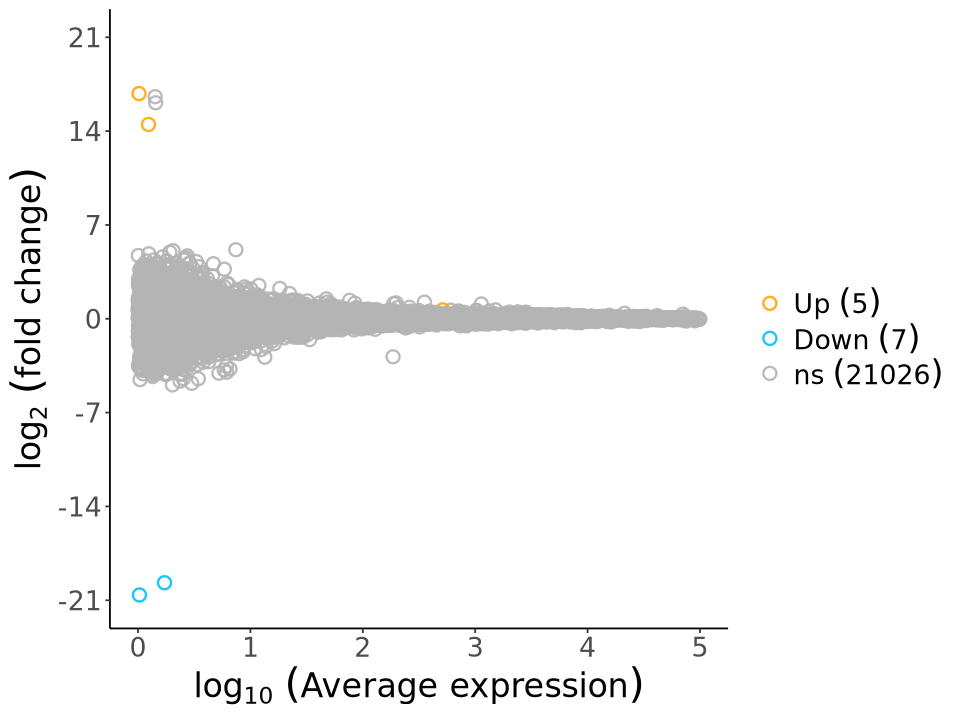

In [30]:
# MA plot - Young Samples with Interaction
r <- ggplot(data = res_young.complete.INTERACTION, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_young[3]))), bquote("Down"~(.(countDE_young[1]))), bquote("ns"~(.(countDE_young[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-21.0, 21.0, 7.0)),     
                     limits = c(-21.0, 21.0))+
    scale_x_continuous(breaks = c(seq(0, 5, 1)),
                       limits = c(0, 5))
r

In [31]:
#ggsave("figures/Volcano_YoungcKOvsCtrl_INTERACTION.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_YoungcKOvsCtrl_INTERACTION.pdf", plot = r, width = 6, height = 4, units = "in")

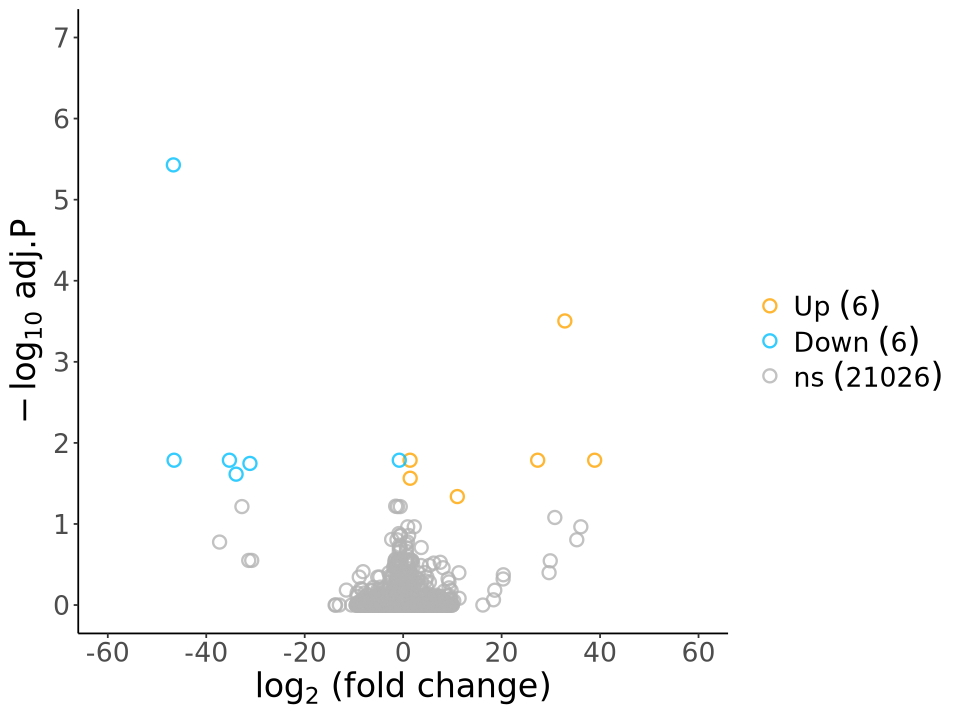

In [32]:
#Volcano Plot - Aged Samples w/ Interaction
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_aged.complete.INTERACTION, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_aged[3]))), bquote("Down"~(.(countDE_aged[1]))), bquote("ns"~(.(countDE_aged[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-60, 60, 20)),     
                     limits = c(-60, 60))+
    scale_y_continuous(breaks = c(seq(0, 7, 1)),
                       limits = c(0,7))
p

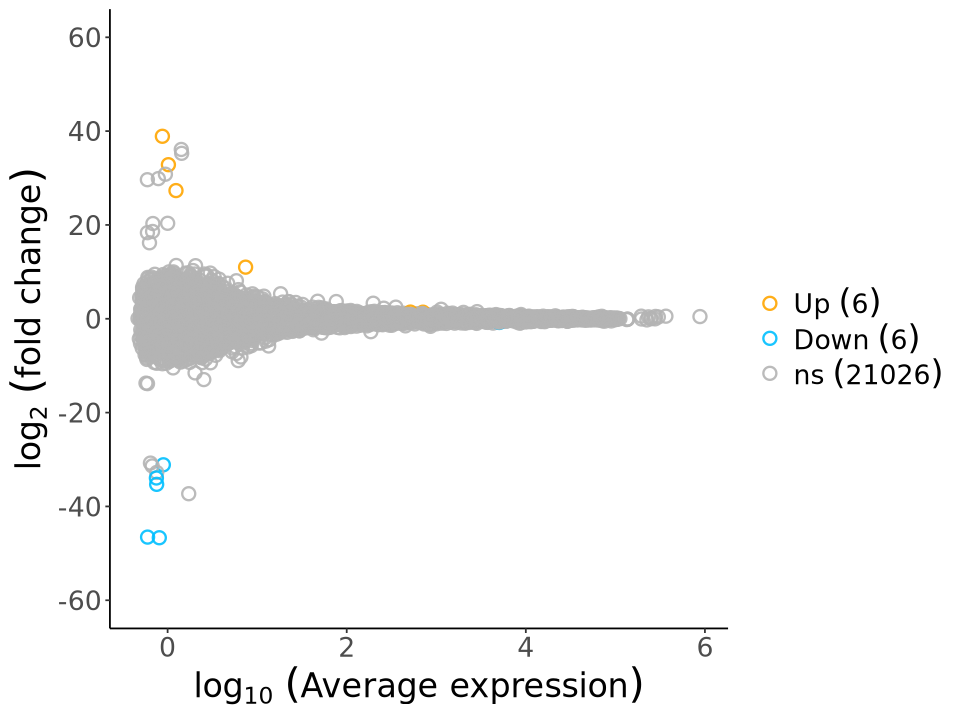

In [33]:
# MA plot - Aged Samples with Interaction
r <- ggplot(data = res_aged.complete.INTERACTION, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_aged[3]))), bquote("Down"~(.(countDE_aged[1]))), bquote("ns"~(.(countDE_aged[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-60, 60, 20)),     
                     limits = c(-60, 60))
r

In [34]:
#ggsave("figures/Volcano_AgedcKOvsCtrl_INTERACTION.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_AgedcKOvsCtrl_INTERACTION.pdf", plot = r, width = 6, height = 4, units = "in")

In [35]:
#double-check that countData columns and metaData rows have the same names
all(colnames(countData) == rownames(metaData))

[1] TRUE

In [36]:
#re-do analysis with no interaction term and keeping young and aged samples completely separate!
# Create DESeqDataSet
# Subset for Young samples
dds_young <- DESeqDataSetFromMatrix(countData = countData[, metaData$Age == "4months"],
                                    colData = metaData[metaData$Age == "4months", ],
                                    design = ~ Sex + Genotype)

dds_young <- dds_young[rowSums(counts(dds_young)) > 10, ]
dds_young <- DESeq(dds_young)
res_young <- results(dds_young, name = "Genotype_cKO_vs_Ctrl")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [37]:
#subset for Aged samples
dds_aged <- DESeqDataSetFromMatrix(countData = countData[, metaData$Age == "20months"],
                                    colData = metaData[metaData$Age == "20months", ],
                                    design = ~ Sex + Genotype)

dds_aged <- dds_aged[rowSums(counts(dds_aged)) > 10, ]
dds_aged <- DESeq(dds_aged)
res_aged <- results(dds_aged, name = "Genotype_cKO_vs_Ctrl")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [38]:
#build a new dataframe containing only the 'complete cases', i.e., rows with no NAs
res_young.complete <- as.data.frame(res_young[complete.cases(res_young),])
res_aged.complete <- as.data.frame(res_aged[complete.cases(res_aged),])

#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.05
res_young.complete$DE <- "ns"
res_young.complete$DE[res_young.complete$log2FoldChange > 0 & res_young.complete$padj < 0.05] <- "Up"
res_young.complete$DE[res_young.complete$log2FoldChange < 0 & res_young.complete$padj < 0.05] <- "Down"

res_aged.complete$DE <- "ns"
res_aged.complete$DE[res_aged.complete$log2FoldChange > 0 & res_aged.complete$padj < 0.05] <- "Up"
res_aged.complete$DE[res_aged.complete$log2FoldChange < 0 & res_aged.complete$padj < 0.05] <- "Down"

countDE_young <- table(res_young.complete$DE)
countDE_young

countDE_aged <- table(res_aged.complete$DE)
countDE_aged


 Down    ns    Up 
   16 11745    28 


 Down    ns    Up 
    2 14453     2 

In [39]:
#print out DEGs for both
res_young.complete[res_young.complete$DE != "ns", ]
res_aged.complete[res_aged.complete$DE != "ns", ]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sulf1,820.1291,0.4550916,0.10396258,4.377456,1.200729e-05,0.0108887613,Up
Ogfrl1,8290.3863,0.2445734,0.05026943,4.865251,1.143118e-06,0.0026952440,Up
B3galt2,2848.7490,0.2342725,0.06023655,3.889208,1.005717e-04,0.0359284867,Up
Pbx1,9825.0308,0.1706585,0.04323154,3.947547,7.895589e-05,0.0332831921,Up
Kcnh1,7909.8914,-0.1809041,0.04547047,-3.978496,6.935251e-05,0.0314460285,Down
Arhgap15,788.8447,-0.5067107,0.12231650,-4.142620,3.433610e-05,0.0202394153,Down
Lamp5,17672.5649,-0.2406729,0.05383677,-4.470418,7.806669e-06,0.0076694017,Down
Syndig1,2685.2238,-0.2337625,0.05997099,-3.897926,9.701994e-05,0.0359284867,Down
Rxfp1,669.8704,0.5788335,0.14936401,3.875321,1.064840e-04,0.0369217734,Up


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Lypd1,2567.6177,-0.5538626,0.12633433,-4.384102,1.164651e-05,0.04631423,Down
Gm26673,542.0066,0.5765103,0.12532731,4.600037,4.224156e-06,0.04631423,Up
Hapln4,9726.3181,0.3173758,0.07056151,4.497860,6.864090e-06,0.04631423,Up
Cpne7,792.1456,-0.2919399,0.06690880,-4.363252,1.281434e-05,0.04631423,Down


In [40]:
res_young.complete$Gene <- rownames(res_young.complete)
res_aged.complete$Gene <- rownames(res_aged.complete)

In [41]:
#write.table(res_young.complete,file="Young_cKOvsCTRL_complete_results_NO_INTERACTION_250630.txt",sep="\t",quote=FALSE,row.names=FALSE)
#write.table(res_aged.complete, file="Aged_cKOvsCTRL_complete_results_NO_INTERACTION_250630.txt", sep="\t",quote=FALSE,row.names=FALSE)

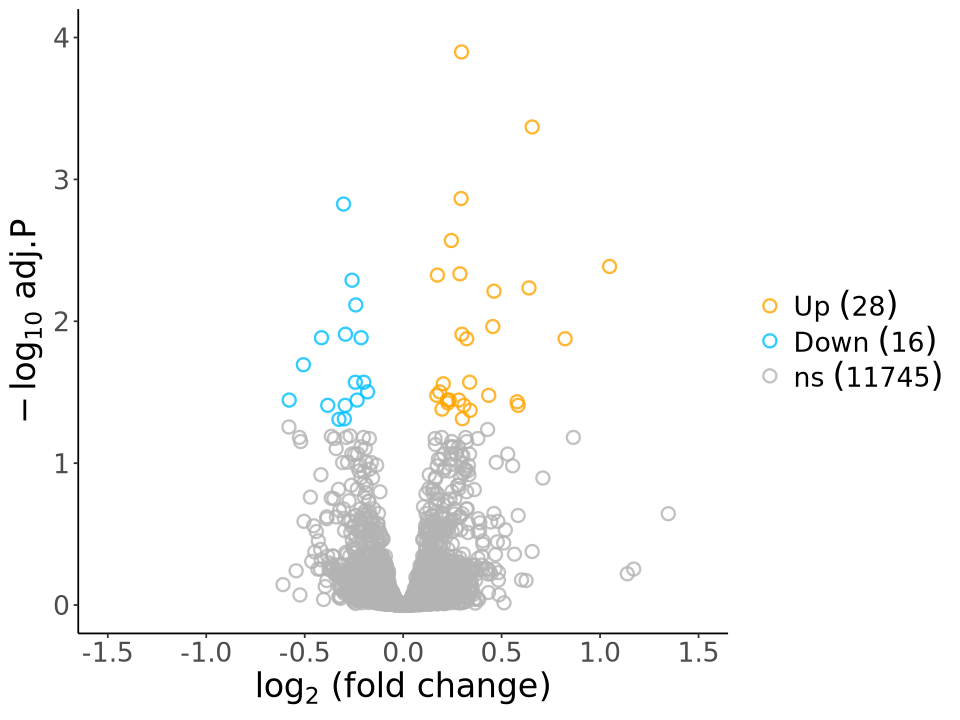

In [42]:
#Volcano Plot - Young Samples NO INTERACTION
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_young.complete, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_young[3]))), bquote("Down"~(.(countDE_young[1]))), bquote("ns"~(.(countDE_young[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-1.5, 1.5, 0.5)),     
                     limits = c(-1.5, 1.5))+
    scale_y_continuous(breaks = c(seq(0, 4, 1.0)),
                       limits = c(0,4))
p

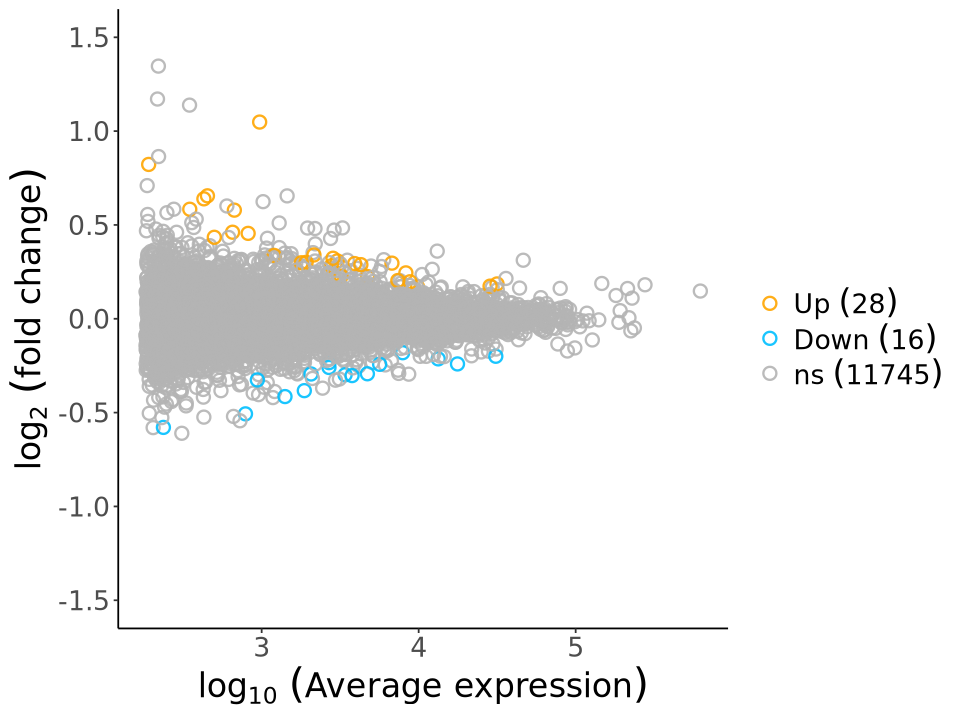

In [43]:
# MA plot - Young Samples NO INTERACTION
r <- ggplot(data = res_young.complete, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_young[3]))), bquote("Down"~(.(countDE_young[1]))), bquote("ns"~(.(countDE_young[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-1.5, 1.5, 0.5)),     
                     limits = c(-1.5, 1.5))
r

In [44]:
#ggsave("figures/Volcano_YoungcKOvsCtrl.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_YoungcKOvsCtrl.pdf", plot = r, width = 6, height = 4, units = "in")

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


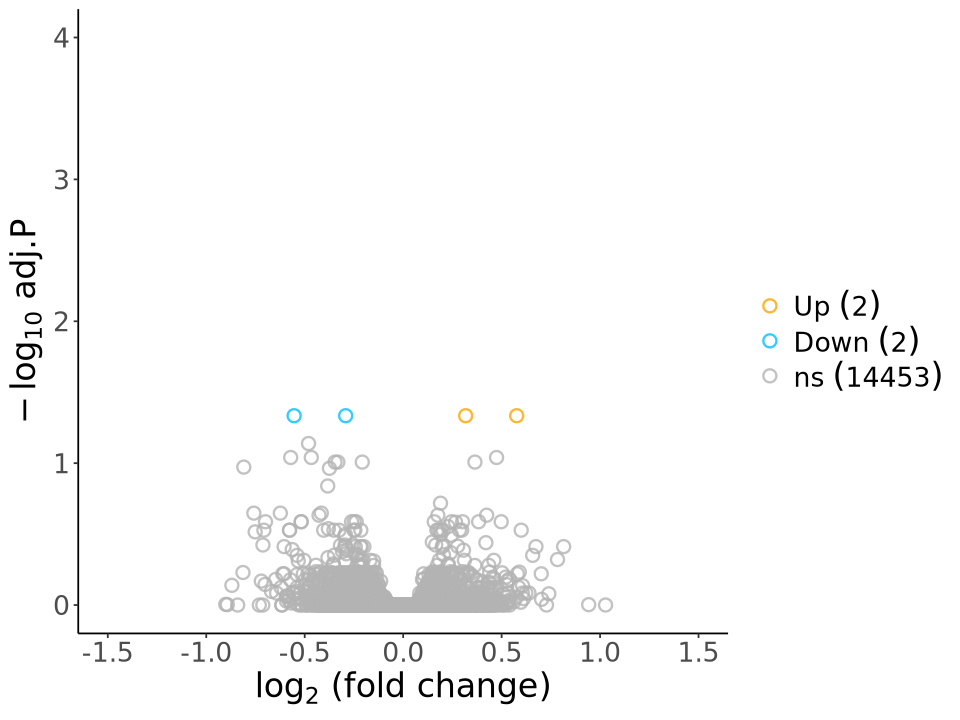

In [45]:
#Volcano Plot - Aged Samples NO INTERACTION
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_aged.complete, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_aged[3]))), bquote("Down"~(.(countDE_aged[1]))), bquote("ns"~(.(countDE_aged[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-1.5, 1.5, 0.5)),     
                     limits = c(-1.5, 1.5))+
    scale_y_continuous(breaks = c(seq(0, 4, 1)),
                       limits = c(0,4))
p

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


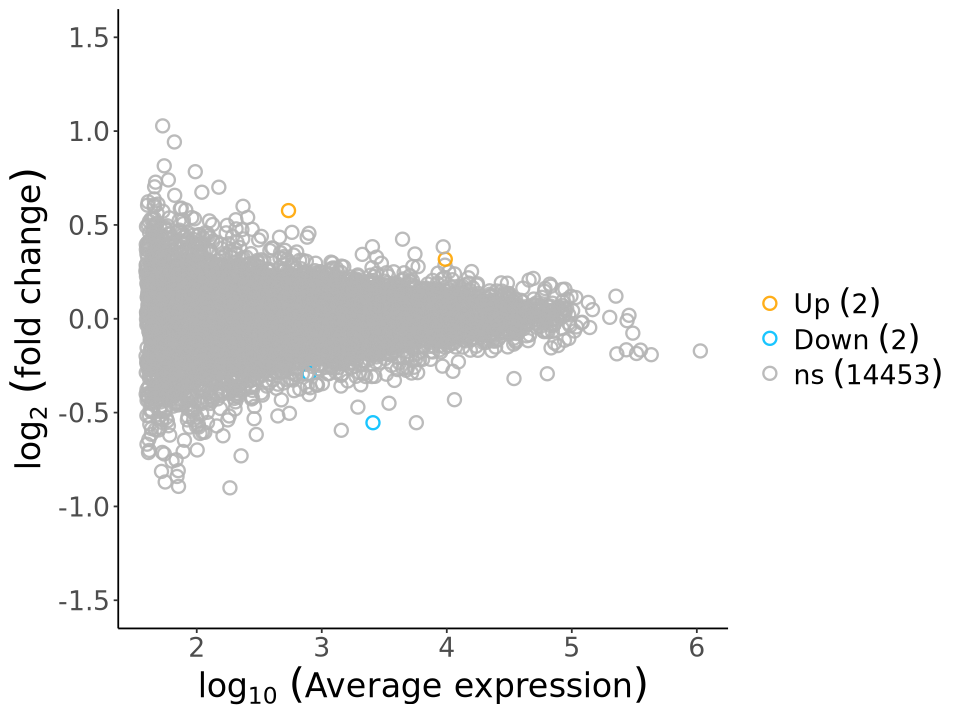

In [46]:
# MA plot - Aged Samples NO INTERACTION
r <- ggplot(data = res_aged.complete, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_aged[3]))), bquote("Down"~(.(countDE_aged[1]))), bquote("ns"~(.(countDE_aged[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-1.5, 1.5, 0.5)),     
                     limits = c(-1.5, 1.5))
r

In [47]:
#ggsave("figures/Volcano_AgedcKOvsCtrl.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_AgedcKOvsCtrl.pdf", plot = r, width = 6, height = 4, units = "in")

In [48]:
#re-do analysis with no interaction term comparing Aged controls vs Young controls!
# Create DESeqDataSet
# Subset for control samples
dds_agecomp <- DESeqDataSetFromMatrix(
  countData = countData[, metaData$Genotype == "Ctrl"],
  colData = metaData[metaData$Genotype == "Ctrl", ],
  design = ~ Sex + Age
)

In [49]:
dds_agecomp <- dds_agecomp[rowSums(counts(dds_agecomp)) > 10, ]

In [50]:
dds_agecomp <- DESeq(dds_agecomp)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [51]:
dds_agecomp$Age <- relevel(dds_agecomp$Age, ref = "4months")

In [52]:
res_agecomp <- results(dds_agecomp, name = "Age_20months_vs_4months")

In [53]:
summary(res_agecomp)


out of 19967 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2948, 15%
LFC < 0 (down)     : 2925, 15%
outliers [1]       : 7, 0.035%
low counts [2]     : 1934, 9.7%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [54]:
#build a new dataframe containing only the 'complete cases', i.e., rows with no NAs
res_agecomp.complete <- as.data.frame(res_agecomp[complete.cases(res_agecomp),])

#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.05
res_agecomp.complete$DE <- "ns"
res_agecomp.complete$DE[res_agecomp.complete$log2FoldChange > 0 & res_agecomp.complete$padj < 0.05] <- "Up"
res_agecomp.complete$DE[res_agecomp.complete$log2FoldChange < 0 & res_agecomp.complete$padj < 0.05] <- "Down"

In [55]:
countDE_agecomp <- table(res_agecomp.complete$DE)
countDE_agecomp


 Down    ns    Up 
 2371 13259  2396 

In [56]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [57]:
#print out DEGs for both
res_agecomp.complete %>%
  filter(DE == "Up") %>%
  arrange(padj) %>%
  head(20)

res_agecomp.complete %>%
  filter(DE == "Down") %>%
  arrange(padj) %>%
  head(20)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AC149090.1,16071.1710,1.9335082,0.10921037,17.704437,3.875363e-70,6.985730e-66,Up
Flnb,2910.4390,0.9243251,0.06640012,13.920534,4.753405e-44,2.856163e-40,Up
Zcchc7,1005.1997,0.9779781,0.07593446,12.879239,5.891325e-38,2.654926e-34,Up
Stxbp2,878.9949,0.9308066,0.07896205,11.788025,4.499670e-32,1.351851e-28,Up
Trank1,10717.5101,0.9525101,0.08521130,11.178213,5.212879e-29,1.174592e-25,Up
Wsb1,1822.0294,0.8470726,0.08269394,10.243465,1.266181e-24,2.536019e-21,Up
Acvrl1,911.3024,0.8098276,0.08146536,9.940760,2.767080e-23,4.987939e-20,Up
Firre,1550.2629,1.0252845,0.10488388,9.775426,1.435528e-22,2.352439e-19,Up
Col5a1,519.0558,1.2634983,0.13040820,9.688795,3.364742e-22,5.054404e-19,Up


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Nrep,2711.3085,-0.8741187,0.06062621,-14.418166,3.977736e-47,3.585133e-43,Down
Met,373.7715,-1.6886856,0.13202666,-12.790489,1.853035e-37,6.680563e-34,Down
Dclk3,2368.2615,-0.7062540,0.06113960,-11.551498,7.254465e-31,1.868128e-27,Down
Nrgn,91776.6594,-0.5120441,0.05556819,-9.214697,3.121578e-20,2.813478e-17,Down
Rgs4,26531.3802,-0.7501174,0.08373635,-8.958085,3.303646e-19,2.382061e-16,Down
Atp1a1,77360.2991,-0.6795132,0.07589804,-8.952974,3.460304e-19,2.399055e-16,Down
Ptpro,784.2070,-0.7862190,0.08879725,-8.854093,8.436738e-19,5.069355e-16,Down
Rgs7,5178.6938,-0.3991646,0.04898963,-8.147942,3.701699e-16,1.588734e-13,Down
Pcdh20,998.2579,-0.7104018,0.08775897,-8.094920,5.730223e-16,2.402163e-13,Down


In [58]:
res_agecomp.complete$Gene <- rownames(res_agecomp.complete)

In [59]:
#write.table(res_agecomp.complete,file="Aged_CTRLvsYoung_CTRL_complete_results_NO_INTERACTION_250630.txt",sep="\t",quote=FALSE,row.names=FALSE)

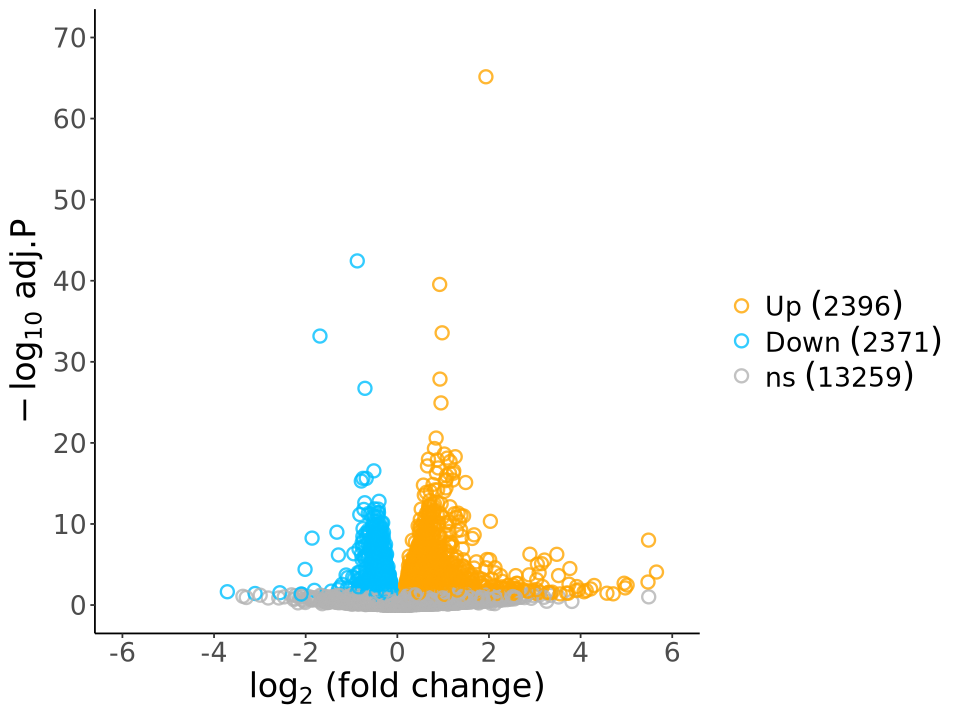

In [60]:
#Volcano Plot - Aged vs Young Controls NO INTERACTION
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_agecomp.complete, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_agecomp[3]))), bquote("Down"~(.(countDE_agecomp[1]))), bquote("ns"~(.(countDE_agecomp[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-6, 6, 2)),     
                     limits = c(-6, 6))+
    scale_y_continuous(breaks = c(seq(0, 70, 10)),
                       limits = c(0,70))
p

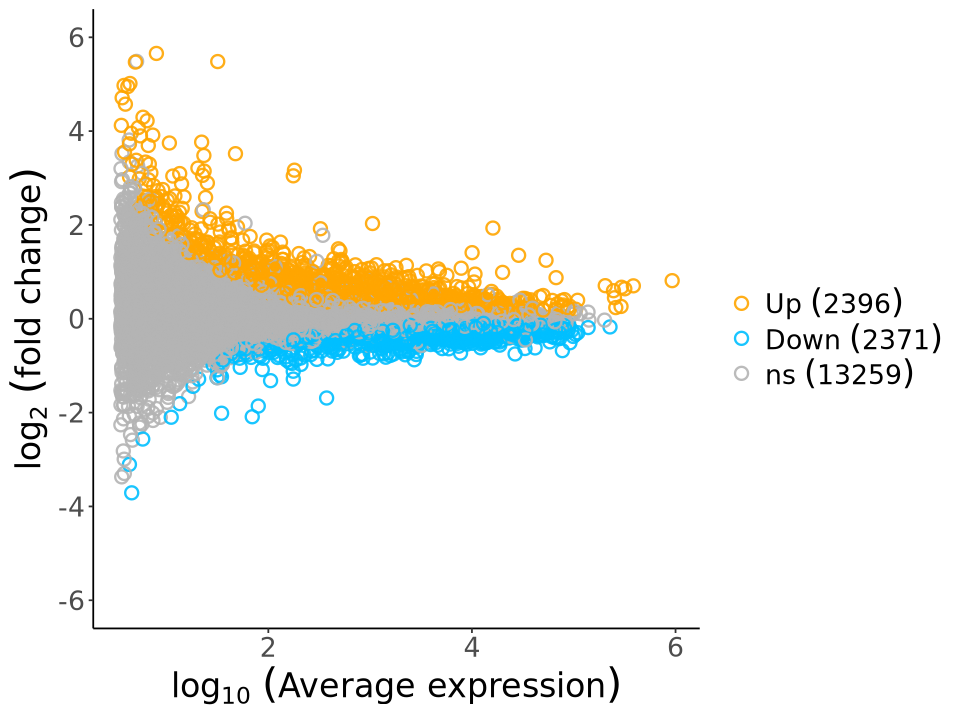

In [61]:
#MA Plot - Aged vs Young Controls NO INTERACTION
r <- ggplot(data = res_agecomp.complete, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_agecomp[3]))), bquote("Down"~(.(countDE_agecomp[1]))), bquote("ns"~(.(countDE_agecomp[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-6, 6, 2)),     
                     limits = c(-6, 6))
r

In [62]:
#ggsave("figures/Volcano_Ctrl_AgedvsYoung.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_Ctrl_AgedvsYoung.pdf", plot = r, width = 6, height = 4, units = "in")

In [63]:
#re-do analysis with no interaction term comparing Aged cKO vs Young cKO!
# Create DESeqDataSet
# Subset for control samples
dds_agecompcKO <- DESeqDataSetFromMatrix(
  countData = countData[, metaData$Genotype == "cKO"],
  colData = metaData[metaData$Genotype == "cKO", ],
  design = ~ Sex + Age
)

In [64]:
dds_agecompcKO <- dds_agecompcKO[rowSums(counts(dds_agecompcKO)) > 10, ]

In [65]:
dds_agecompcKO <- DESeq(dds_agecompcKO)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [66]:
dds_agecompcKO$Age <- relevel(dds_agecompcKO$Age, ref = "4months")

In [67]:
res_agecompcKO <- results(dds_agecompcKO, name = "Age_20months_vs_4months")

In [68]:
#build a new dataframe containing only the 'complete cases', i.e., rows with no NAs
res_agecompcKO.complete <- as.data.frame(res_agecompcKO[complete.cases(res_agecompcKO),])

#add a new column called "DE" that contains "ns", "Up", and "Down" for genes with Padj < 0.05
res_agecompcKO.complete$DE <- "ns"
res_agecompcKO.complete$DE[res_agecompcKO.complete$log2FoldChange > 0 & res_agecompcKO.complete$padj < 0.05] <- "Up"
res_agecompcKO.complete$DE[res_agecompcKO.complete$log2FoldChange < 0 & res_agecompcKO.complete$padj < 0.05] <- "Down"

In [69]:
countDE_agecompcKO <- table(res_agecompcKO.complete$DE)
countDE_agecompcKO


 Down    ns    Up 
 1771 13186  1810 

In [70]:
res_agecompcKO.complete$Gene <- rownames(res_agecompcKO.complete)

In [71]:
#write.table(res_agecompcKO.complete,file="Aged_cKOvsYoung_cKO_complete_results_NO_INTERACTION_250701.txt",sep="\t",quote=FALSE,row.names=FALSE)

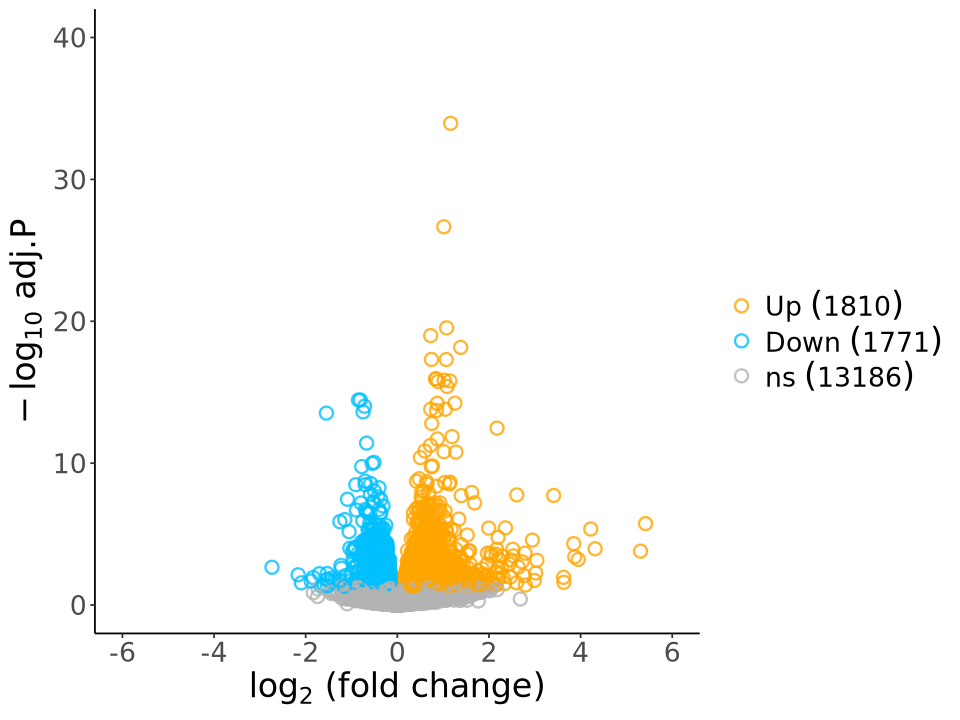

In [72]:
#Volcano Plot - Aged vs Young cKOs NO INTERACTION
options(repr.plot.width = 8, repr.plot.height = 6)
cols <- c("Down" = "deepskyblue", "ns" = "grey70", "Up" = "orange")
p <- ggplot(data = res_agecompcKO.complete, aes(x = log2FoldChange, y = -log10(padj), col = DE)) + 
    geom_point(alpha = 0.8, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() + 
    xlab(bquote(log[2]~"(fold change)")) +
    ylab(bquote(-log[10]~adj.P)) + 
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_agecompcKO[3]))), bquote("Down"~(.(countDE_agecompcKO[1]))), bquote("ns"~(.(countDE_agecompcKO[2]))))) +
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_x_continuous(breaks = c(seq(-6, 6, 2)),     
                     limits = c(-6, 6))+
    scale_y_continuous(breaks = c(seq(0, 40, 10)),
                       limits = c(0,40))
p

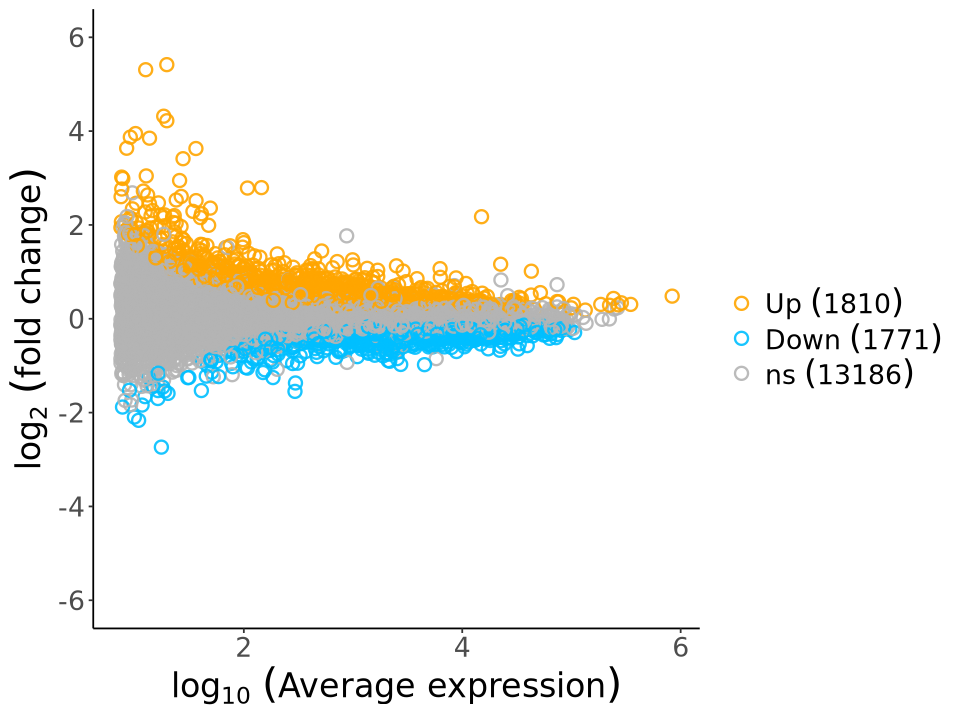

In [73]:
#MA Plot - Aged vs Young Controls NO INTERACTION
r <- ggplot(data = res_agecompcKO.complete, aes(x = log10(baseMean), y = log2FoldChange, col = DE)) + 
    geom_point(alpha = 0.9, shape = 21, size = 3, stroke = 1) + 
    theme_minimal() +   
    xlab(bquote(log[10]~("Average expression"))) +
    ylab(bquote(log[2]~("fold change"))) +
    scale_color_manual(values = cols, name = "", breaks = c("Up", "Down", "ns"), 
                       labels = c(bquote("Up"~(.(countDE_agecompcKO[3]))), bquote("Down"~(.(countDE_agecompcKO[1]))), bquote("ns"~(.(countDE_agecompcKO[2]))))) +    
    theme_classic() +    
    theme(text = element_text(size = 20)) +
    theme(axis.line = element_line(size = 0.5))+
    scale_y_continuous(breaks = c(seq(-6, 6, 2)),     
                     limits = c(-6, 6))
r

In [74]:
#ggsave("figures/Volcano_cKO_AgedvsYoung.pdf", plot = p, width = 6, height = 4, units = "in")
#ggsave("figures/MA_cKO_AgedvsYoung.pdf", plot = r, width = 6, height = 4, units = "in")

In [75]:
#generate TPM values on count matrix, then export
library(readxl)
#Calculating TPM
lengths <- read_excel("gene_lengths_mm10.xlsx", sheet = 1, col_names = TRUE)
lengths <- as.data.frame(lengths)
head(lengths)
str(lengths)

,Geneid,Length
,<chr>,<dbl>
1,Xkr4,6094
2,Gm1992,250
3,Gm19938,3259
4,Gm37381,1364
5,Rp1,12311
6,Sox17,4772


'data.frame':	32245 obs. of  2 variables:
 $ Geneid: chr  "Xkr4" "Gm1992" "Gm19938" "Gm37381" ...
 $ Length: num  6094 250 3259 1364 12311 ...


In [76]:
str(countData)

'data.frame':	32245 obs. of  20 variables:
 $ Aged_C1  : int  2325 0 2 0 4 217 2 0 1062 1653 ...
 $ Aged_C2  : int  1994 0 3 0 0 335 0 0 1418 1818 ...
 $ Aged_C3  : int  1862 0 6 0 1 424 0 0 1427 2156 ...
 $ Aged_C4  : int  1589 0 8 0 12 389 0 0 1298 1812 ...
 $ Aged_C5  : int  1415 0 1 0 0 351 0 0 1162 1454 ...
 $ Aged_C6  : int  1837 0 2 0 0 402 4 0 1504 1862 ...
 $ Aged_KO1 : int  2284 0 0 0 12 258 1 0 1204 1431 ...
 $ Aged_KO2 : int  1709 0 2 0 2 291 0 0 1356 1634 ...
 $ Aged_KO3 : int  1885 0 0 0 10 343 0 0 1646 2254 ...
 $ Aged_KO4 : int  1485 0 2 0 0 227 0 0 957 1408 ...
 $ Aged_KO5 : int  1115 0 4 0 0 360 10 0 1283 1501 ...
 $ Aged_KO6 : int  1547 0 6 0 14 296 0 0 1416 1668 ...
 $ Young_C1 : int  2057 0 4 0 6 153 2 0 1234 1708 ...
 $ Young_C2 : int  1627 0 2 0 6 187 0 10 992 1528 ...
 $ Young_C3 : int  2512 0 4 0 6 184 0 0 1362 2046 ...
 $ Young_C4 : int  2386 0 3 0 4 180 4 0 1147 1748 ...
 $ Young_KO1: int  1874 0 2 0 0 194 0 0 908 1522 ...
 $ Young_KO2: int  2523 0 0 0 10 213

In [77]:
counts <- countData
counts

,Aged_C1,Aged_C2,Aged_C3,Aged_C4,Aged_C5,Aged_C6,Aged_KO1,Aged_KO2,Aged_KO3,Aged_KO4,Aged_KO5,Aged_KO6,Young_C1,Young_C2,Young_C3,Young_C4,Young_KO1,Young_KO2,Young_KO3,Young_KO4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Xkr4,2325,1994,1862,1589,1415,1837,2284,1709,1885,1485,1115,1547,2057,1627,2512,2386,1874,2523,2260,2374
Gm1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gm19938,2,3,6,8,1,2,0,2,0,2,4,6,4,2,4,3,2,0,0,8
Gm37381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Rp1,4,0,1,12,0,0,12,2,10,0,0,14,6,6,6,4,0,10,0,2
Sox17,217,335,424,389,351,402,258,291,343,227,360,296,153,187,184,180,194,213,180,166
Gm37587,2,0,0,0,0,4,1,0,0,0,10,0,2,0,0,4,0,2,2,0
Gm37323,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0
Mrpl15,1062,1418,1427,1298,1162,1504,1204,1356,1646,957,1283,1416,1234,992,1362,1147,908,1365,1046,1266


In [78]:
sumcounts <- as.vector(colSums(counts)/1e6)
lengths_kb <- as.vector(lengths[,2]/1000)

In [79]:
FPKM <- sweep(counts, 2, sumcounts, FUN = '/')
FPKM <- sweep(FPKM, 1, lengths_kb, FUN = '/')

In [80]:
sumFPKM <- as.vector(colSums(FPKM)/1e6)

In [81]:
TPM <- sweep(FPKM, 2, sumFPKM, FUN = '/')

In [82]:
head(TPM)

,Aged_C1,Aged_C2,Aged_C3,Aged_C4,Aged_C5,Aged_C6,Aged_KO1,Aged_KO2,Aged_KO3,Aged_KO4,Aged_KO5,Aged_KO6,Young_C1,Young_C2,Young_C3,Young_C4,Young_KO1,Young_KO2,Young_KO3,Young_KO4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xkr4,30.96013167,22.126422,19.175410527,18.20251657,19.27449270,18.44858787,28.75553893,21.27956897,19.63263537,24.17667455,12.94758236,18.09687618,27.08935465,24.12818063,29.55318048,31.15225649,27.90711024,31.61090949,32.251622,29.68346747
Gm1992,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000
Gm19938,0.04979984,0.062248,0.115540524,0.17136243,0.02547092,0.03755797,0.00000000,0.04656599,0.00000000,0.06088611,0.08685441,0.13124496,0.09850141,0.05546067,0.08799595,0.07324170,0.05569207,0.00000000,0.000000,0.18704323
Gm37381,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000
Rp1,0.02636629,0.000000,0.005097698,0.06804526,0.00000000,0.00000000,0.07478522,0.01232707,0.05155566,0.00000000,0.00000000,0.08106819,0.03911332,0.04404508,0.03494177,0.02585164,0.00000000,0.06201959,0.000000,0.01237864
Sox17,3.69012936,4.747149,5.576129681,5.69061434,6.10570262,5.15563354,4.14808009,4.62717333,4.56208509,4.71952165,5.33848873,4.42188076,2.57310680,3.54144616,2.76442256,3.00119069,3.68934294,3.40801391,3.280331,2.65059894


In [83]:
#write.table(TPM, "TPM_250630.csv", sep = ",", col.names = NA)

In [84]:
#merging TPM table with DESeq2 results to create clean summary table!
TPM$Gene <- rownames(TPM)
TPM <- TPM[, c("Gene", setdiff(names(TPM), "Gene"))]
head(TPM)

,Gene,Aged_C1,Aged_C2,Aged_C3,Aged_C4,Aged_C5,Aged_C6,Aged_KO1,Aged_KO2,Aged_KO3,⋯,Aged_KO5,Aged_KO6,Young_C1,Young_C2,Young_C3,Young_C4,Young_KO1,Young_KO2,Young_KO3,Young_KO4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xkr4,Xkr4,30.96013167,22.126422,19.175410527,18.20251657,19.27449270,18.44858787,28.75553893,21.27956897,19.63263537,⋯,12.94758236,18.09687618,27.08935465,24.12818063,29.55318048,31.15225649,27.90711024,31.61090949,32.251622,29.68346747
Gm1992,Gm1992,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000
Gm19938,Gm19938,0.04979984,0.062248,0.115540524,0.17136243,0.02547092,0.03755797,0.00000000,0.04656599,0.00000000,⋯,0.08685441,0.13124496,0.09850141,0.05546067,0.08799595,0.07324170,0.05569207,0.00000000,0.000000,0.18704323
Gm37381,Gm37381,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000
Rp1,Rp1,0.02636629,0.000000,0.005097698,0.06804526,0.00000000,0.00000000,0.07478522,0.01232707,0.05155566,⋯,0.00000000,0.08106819,0.03911332,0.04404508,0.03494177,0.02585164,0.00000000,0.06201959,0.000000,0.01237864
Sox17,Sox17,3.69012936,4.747149,5.576129681,5.69061434,6.10570262,5.15563354,4.14808009,4.62717333,4.56208509,⋯,5.33848873,4.42188076,2.57310680,3.54144616,2.76442256,3.00119069,3.68934294,3.40801391,3.280331,2.65059894


In [85]:
#cKO vs control across ages using INTERACTION TERM model
head(res_young.complete.INTERACTION)
head(res_aged.complete.INTERACTION)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1926.9450379,0.1443831,0.1289008,1.1201096,0.2626670,0.9997263,ns,Xkr4
Gm19938,2.8896360,-0.2896803,1.1879017,-0.2438588,0.8073402,0.9997263,ns,Gm19938
Rp1,4.2995848,-1.0547175,1.4687352,-0.7181127,0.4726878,0.9997263,ns,Rp1
Sox17,262.6734850,0.1427352,0.1452544,0.9826569,0.3257763,0.9997263,ns,Sox17
Gm37587,1.3132895,-0.5745411,2.3792305,-0.2414819,0.8091817,0.9997263,ns,Gm37587
Gm37323,0.6775915,-1.9808910,4.4495494,-0.4451891,0.6561831,0.9997263,ns,Gm37323


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1926.9450379,0.34333935,0.2786057,1.23234882,0.2178188,1,ns,Xkr4
Gm19938,2.8896360,-0.02640297,2.5668022,-0.01028633,0.9917928,1,ns,Gm19938
Rp1,4.2995848,-3.28995421,3.1693500,-1.03805330,0.2992452,1,ns,Rp1
Sox17,262.6734850,0.45134431,0.3111868,1.45039655,0.1469480,1,ns,Sox17
Gm37587,1.3132895,-2.09360648,5.1383186,-0.40744972,0.6836777,1,ns,Gm37587
Gm37323,0.6775915,-4.04301357,9.6417414,-0.41932400,0.6749794,1,ns,Gm37323


In [86]:
#cKO vs control across ages with NO INTERACTION (different ages assessed independently)
head(res_young.complete)
head(res_aged.complete)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,2182.804,0.13881389,0.06662278,2.0835801,0.03719838,0.6080136,ns,Xkr4
Mrpl15,1153.013,0.00458978,0.08119925,0.0565249,0.95492366,0.9991204,ns,Mrpl15
Lypla1,1650.687,-0.10678207,0.06751801,-1.5815347,0.11375583,0.8147097,ns,Lypla1
Tcea1,3519.922,0.01287670,0.04699510,0.2740010,0.78408386,0.9898510,ns,Tcea1
Rgs20,2300.295,-0.08815714,0.05823285,-1.5138730,0.13005806,0.8292702,ns,Rgs20
Atp6v1h,8403.416,-0.04713468,0.04618381,-1.0205888,0.30744929,0.9242378,ns,Atp6v1h


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1747.3706,-0.05193289,0.11490629,-0.4519586,0.65129879,0.9996853,ns,Xkr4
Sox17,320.6338,-0.16221929,0.11103706,-1.4609473,0.14402990,0.9996853,ns,Sox17
Mrpl15,1296.1832,0.07411559,0.06659634,1.1129080,0.26574796,0.9996853,ns,Mrpl15
Lypla1,1704.2333,-0.04089728,0.08425156,-0.4854187,0.62737938,0.9996853,ns,Lypla1
Tcea1,3764.1364,-0.02290920,0.06764497,-0.3386683,0.73485964,0.9996853,ns,Tcea1
Rgs20,2064.4503,0.10558150,0.05928980,1.7807699,0.07495005,0.9834003,ns,Rgs20


In [87]:
#Control - Aged vs Young
head(res_agecomp.complete)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1953.099658,-0.275994612,0.08450131,-3.26615772,1.090175e-03,7.073973e-03,Down,Xkr4
Rp1,4.006225,-1.136986161,1.24745595,-0.91144393,3.620615e-01,5.547404e-01,ns,Rp1
Sox17,276.909364,0.805921490,0.14973499,5.38231913,7.353225e-08,2.867515e-06,Up,Sox17
Mrpl15,1246.138377,0.024480686,0.07071771,0.34617474,7.292114e-01,8.448878e-01,ns,Mrpl15
Lypla1,1762.172920,-0.085116183,0.06833544,-1.24556431,2.129244e-01,3.907335e-01,ns,Lypla1
Tcea1,3762.401189,0.005366758,0.07403954,0.07248504,9.422159e-01,9.697449e-01,ns,Tcea1


In [88]:
#cKO - Aged vs Young
head(res_agecompcKO.complete)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DE,Gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Xkr4,1901.3598,-0.49099186,0.13952552,-3.5190110,4.331587e-04,0.0054689551,Down,Xkr4
Sox17,248.9785,0.51668866,0.12565467,4.1119734,3.922915e-05,0.0009658667,Up,Sox17
Mrpl15,1223.7413,0.09305700,0.08880479,1.0478827,2.946927e-01,0.4794203085,ns,Mrpl15
Lypla1,1600.8256,-0.04525503,0.10105740,-0.4478151,6.542867e-01,0.7866393546,ns,Lypla1
Tcea1,3556.6865,-0.03129028,0.07129077,-0.4389106,6.607263e-01,0.7915968351,ns,Tcea1
Rgs20,2121.2544,-0.17091496,0.05771383,-2.9614214,3.062227e-03,0.0213073661,Down,Rgs20


In [89]:
res_young_int_df <- as.data.frame(res_young.complete.INTERACTION) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_YoungcKOvsCtrl_Int = log2FoldChange, padj_YoungcKOvsCtrl_Int = padj, DE_YoungcKOvsCtrl_Int = DE)

res_aged_int_df <- as.data.frame(res_aged.complete.INTERACTION) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_AgedcKOvsCtrl_Int = log2FoldChange, padj_AgedcKOvsCtrl_Int = padj, DE_AgedcKOvsCtrl_Int = DE)

res_young_df <- as.data.frame(res_young.complete) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_YoungcKOvsCtrl = log2FoldChange, padj_YoungcKOvsCtrl = padj, DE_YoungcKOvsCtrl = DE)

res_aged_df <- as.data.frame(res_aged.complete) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_AgedcKOvsCtrl = log2FoldChange, padj_AgedcKOvsCtrl = padj, DE_AgedcKOvsCtrl = DE)

res_agecomp_df <- as.data.frame(res_agecomp.complete) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_agedCtrlvsYoungCtrl = log2FoldChange, padj_agedCtrlvsYoungCtrl = padj, DE_agedCtrlvsYoungCtrl = DE)

res_agecompcKO_df <- as.data.frame(res_agecompcKO.complete) %>%
  select(Gene, log2FoldChange, padj, DE) %>%
  rename(log2FC_agedcKOvsYoungcKO = log2FoldChange, padj_agedcKOvsYoungcKO = padj, DE_agedcKOvsYoungcKO = DE)

head(res_young_int_df)
head(res_aged_int_df)
head(res_young_df)
head(res_aged_df)
head(res_agecomp_df)
head(res_agecompcKO_df)

,Gene,log2FC_YoungcKOvsCtrl_Int,padj_YoungcKOvsCtrl_Int,DE_YoungcKOvsCtrl_Int
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,0.1443831,0.9997263,ns
Gm19938,Gm19938,-0.2896803,0.9997263,ns
Rp1,Rp1,-1.0547175,0.9997263,ns
Sox17,Sox17,0.1427352,0.9997263,ns
Gm37587,Gm37587,-0.5745411,0.9997263,ns
Gm37323,Gm37323,-1.9808910,0.9997263,ns


,Gene,log2FC_AgedcKOvsCtrl_Int,padj_AgedcKOvsCtrl_Int,DE_AgedcKOvsCtrl_Int
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,0.34333935,1,ns
Gm19938,Gm19938,-0.02640297,1,ns
Rp1,Rp1,-3.28995421,1,ns
Sox17,Sox17,0.45134431,1,ns
Gm37587,Gm37587,-2.09360648,1,ns
Gm37323,Gm37323,-4.04301357,1,ns


,Gene,log2FC_YoungcKOvsCtrl,padj_YoungcKOvsCtrl,DE_YoungcKOvsCtrl
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,0.13881389,0.6080136,ns
Mrpl15,Mrpl15,0.00458978,0.9991204,ns
Lypla1,Lypla1,-0.10678207,0.8147097,ns
Tcea1,Tcea1,0.01287670,0.9898510,ns
Rgs20,Rgs20,-0.08815714,0.8292702,ns
Atp6v1h,Atp6v1h,-0.04713468,0.9242378,ns


,Gene,log2FC_AgedcKOvsCtrl,padj_AgedcKOvsCtrl,DE_AgedcKOvsCtrl
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,-0.05193289,0.9996853,ns
Sox17,Sox17,-0.16221929,0.9996853,ns
Mrpl15,Mrpl15,0.07411559,0.9996853,ns
Lypla1,Lypla1,-0.04089728,0.9996853,ns
Tcea1,Tcea1,-0.02290920,0.9996853,ns
Rgs20,Rgs20,0.10558150,0.9834003,ns


,Gene,log2FC_agedCtrlvsYoungCtrl,padj_agedCtrlvsYoungCtrl,DE_agedCtrlvsYoungCtrl
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,-0.275994612,7.073973e-03,Down
Rp1,Rp1,-1.136986161,5.547404e-01,ns
Sox17,Sox17,0.805921490,2.867515e-06,Up
Mrpl15,Mrpl15,0.024480686,8.448878e-01,ns
Lypla1,Lypla1,-0.085116183,3.907335e-01,ns
Tcea1,Tcea1,0.005366758,9.697449e-01,ns


,Gene,log2FC_agedcKOvsYoungcKO,padj_agedcKOvsYoungcKO,DE_agedcKOvsYoungcKO
,<chr>,<dbl>,<dbl>,<chr>
Xkr4,Xkr4,-0.49099186,0.0054689551,Down
Sox17,Sox17,0.51668866,0.0009658667,Up
Mrpl15,Mrpl15,0.09305700,0.4794203085,ns
Lypla1,Lypla1,-0.04525503,0.7866393546,ns
Tcea1,Tcea1,-0.03129028,0.7915968351,ns
Rgs20,Rgs20,-0.17091496,0.0213073661,Down


In [90]:
merged_df <- TPM %>%
  full_join(res_young_df, by = "Gene") %>%
  full_join(res_aged_df, by = "Gene") %>%
  full_join(res_agecomp_df, by = "Gene") %>%
  full_join(res_agecompcKO_df, by = "Gene") %>%
  full_join(res_young_int_df, by = "Gene") %>%
  full_join(res_aged_int_df, by = "Gene")
head(merged_df)

,Gene,Aged_C1,Aged_C2,Aged_C3,Aged_C4,Aged_C5,Aged_C6,Aged_KO1,Aged_KO2,Aged_KO3,⋯,DE_agedCtrlvsYoungCtrl,log2FC_agedcKOvsYoungcKO,padj_agedcKOvsYoungcKO,DE_agedcKOvsYoungcKO,log2FC_YoungcKOvsCtrl_Int,padj_YoungcKOvsCtrl_Int,DE_YoungcKOvsCtrl_Int,log2FC_AgedcKOvsCtrl_Int,padj_AgedcKOvsCtrl_Int,DE_AgedcKOvsCtrl_Int
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,Xkr4,30.96013167,22.126422,19.175410527,18.20251657,19.27449270,18.44858787,28.75553893,21.27956897,19.63263537,⋯,Down,-0.4909919,0.0054689551,Down,0.1443831,0.9997263,ns,0.34333935,1,ns
2,Gm1992,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Gm19938,0.04979984,0.062248,0.115540524,0.17136243,0.02547092,0.03755797,0.00000000,0.04656599,0.00000000,⋯,NA,NA,NA,NA,-0.2896803,0.9997263,ns,-0.02640297,1,ns
4,Gm37381,0.00000000,0.000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Rp1,0.02636629,0.000000,0.005097698,0.06804526,0.00000000,0.00000000,0.07478522,0.01232707,0.05155566,⋯,ns,NA,NA,NA,-1.0547175,0.9997263,ns,-3.28995421,1,ns
6,Sox17,3.69012936,4.747149,5.576129681,5.69061434,6.10570262,5.15563354,4.14808009,4.62717333,4.56208509,⋯,Up,0.5166887,0.0009658667,Up,0.1427352,0.9997263,ns,0.45134431,1,ns


In [91]:
write.table(merged_df, "summary_table_250701.csv", sep = ",", col.names = NA)